## Seung Jun Choi in Urban Information Lab
### Model Evaluation

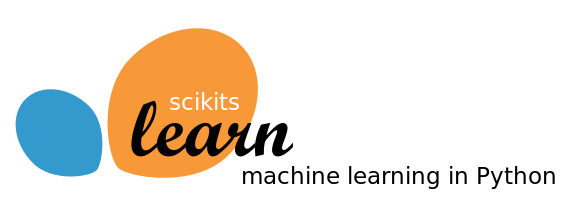

In [3]:
# If you haven't downloaded sklearn...
pip install sklearn

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn

print(sklearn.__version__)

0.23.1


### How to evaluate your models?

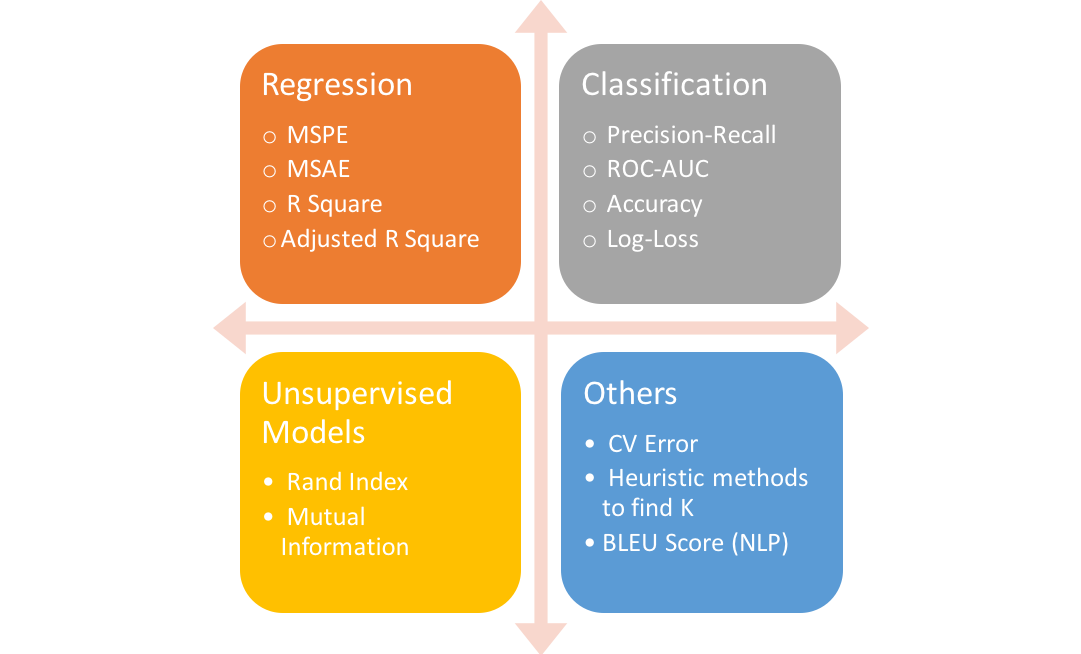

### Regression Model Evaluation is easier than Other Model Evaluation (It is also more intuitive)

Because all you have to do is calculate the loss of model's prediction to real or validation data

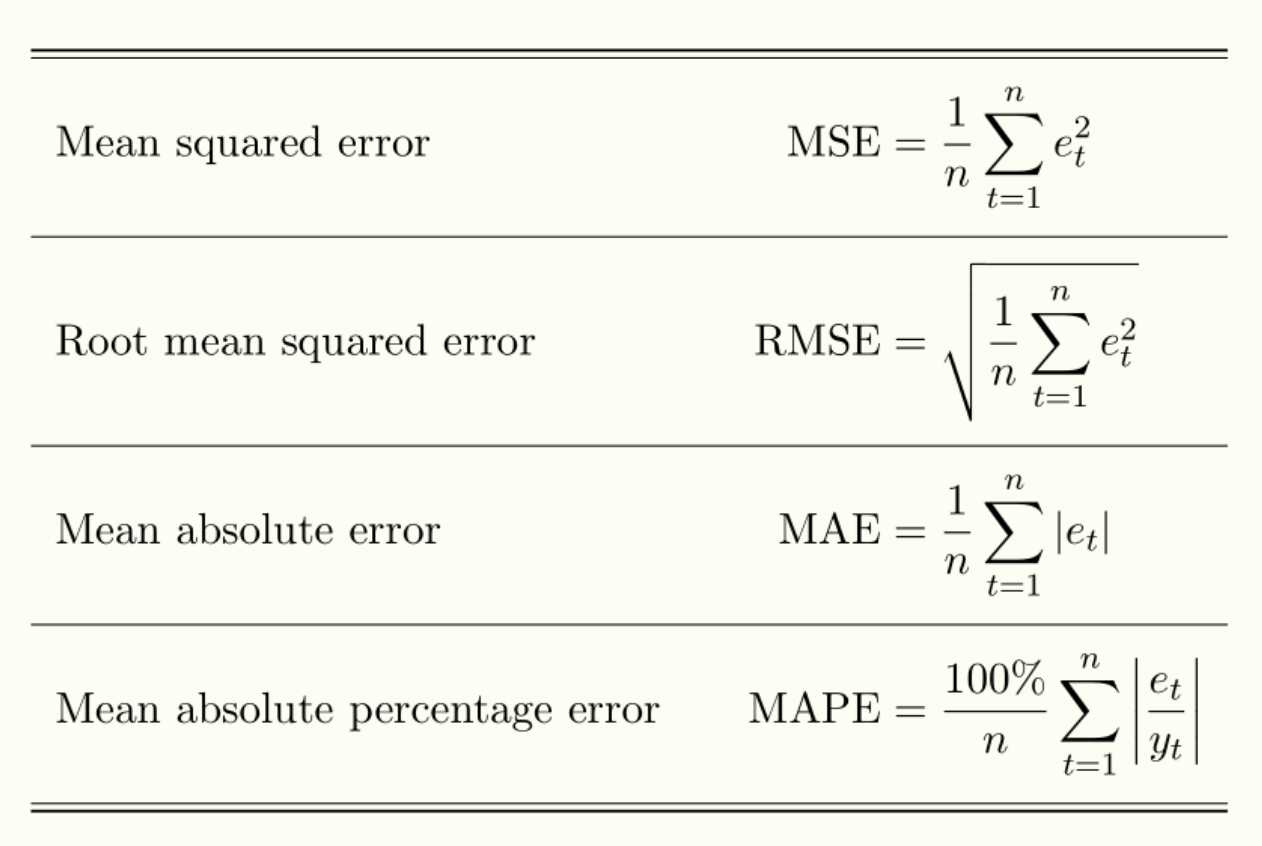

### Here we will focus more on Classification Model Evaluation

#### Import BaseEstimator from sklearn. 
#### BaseEstimator help you create Customized dummy Classifier Classes
#### We use fit() to train model; however, in BaseEstimator fit doesn't really mean anything

In [4]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
     #The model here is just prediction the sex; which is classified into binary dummy (1 vs 0)
    def fit(self, X , y=None):
        pass
    

    #If the value of the sex feature is 1 , it would return 0 if not it would return 1 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred


We will use the created BaseEstimator for modelling classifier model

Here I will be using titanic sample data which is downloadable in Kaggle

# Preprocessing Data

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Prepross null values
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# delete features not in need
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# labeling the strings to numeric dummies
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# calling out the features transformation functions that I have previously defined
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 1. First let's look at Accuracy of your model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# calling out the data, preprocessing data, and training and spliting your model
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# using the dummyclassifier model I have made above
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier Accuaracy is" : {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier Accuaracy is" : 0.7877


## What is Accuracy?

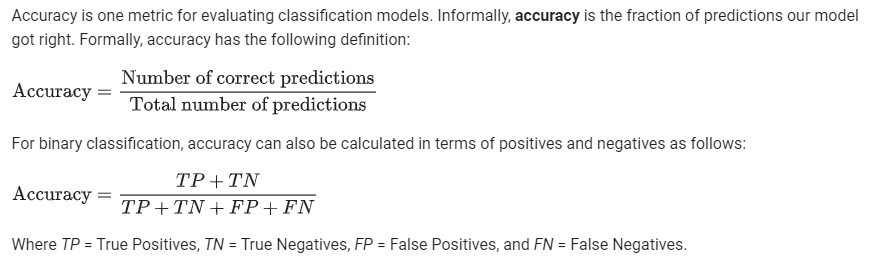

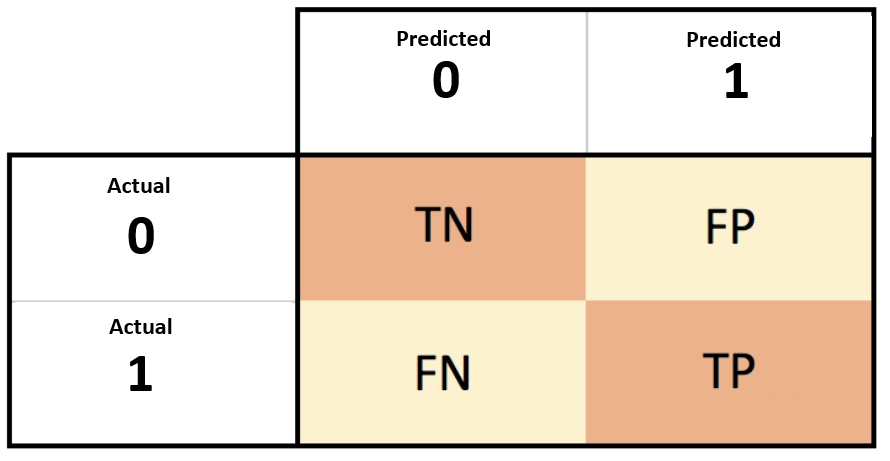

### There other indicators we use

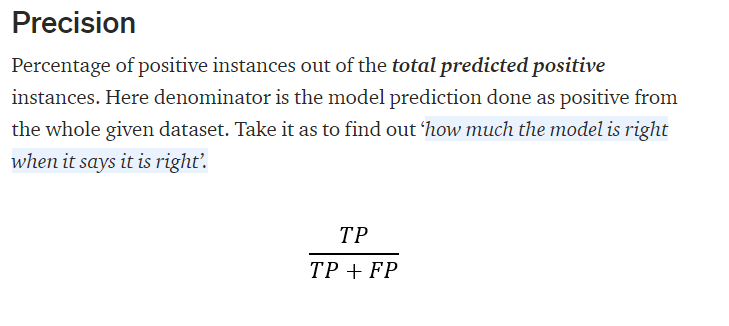

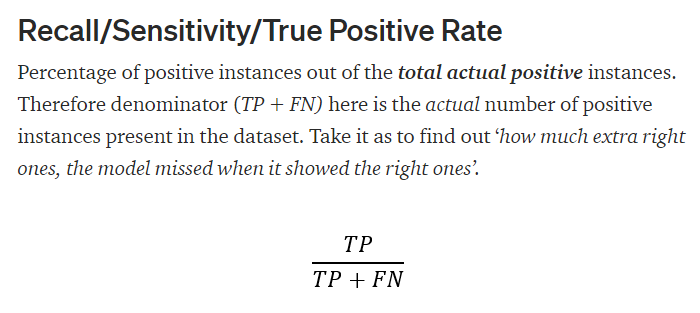

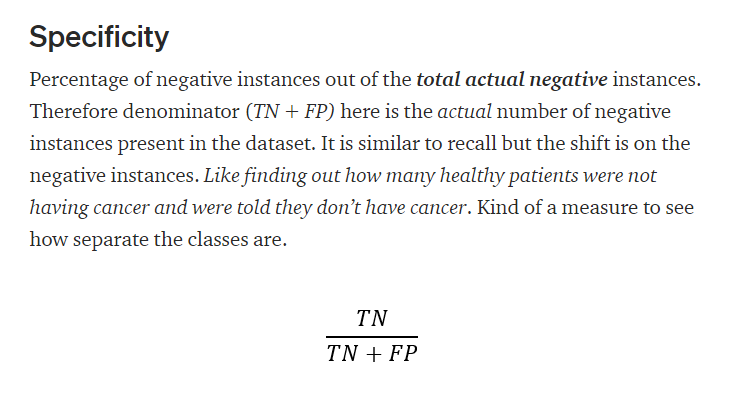

### Chossing the evaluation score depends on your research objective. For instance if you modelling cancer classification risk of doing false negative is higher than doing false positive; meaning model identifying even though you have cancer and not capturing it is riskier

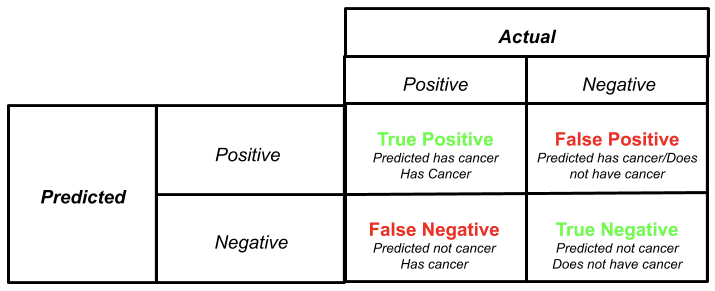

### In this case Recall is more significant indicator than precision (Positive > Negative)

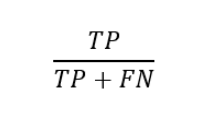

## Decent model is having higher score in both recall and precision score; however they are actually in tradeoff

# 2. Let's get both precision & recall

### I'm going to define some functions for convenience

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [12]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("Precision:", precision_score(y_test, fakepred))
print("Recall:", recall_score(y_test, fakepred))

Precision: 0.0
Recall: 0.0


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Below is the code to get all confusion matrix (accuracy / precision / recall )

In [14]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

#### I'm going to use titanic data from kaggle

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Because dependent variable is binary; I'm using logisticregression
from sklearn.linear_model import LogisticRegression

# reload, preprocess
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

Confusion Matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


And as I said the precision and recall score are in trade-off

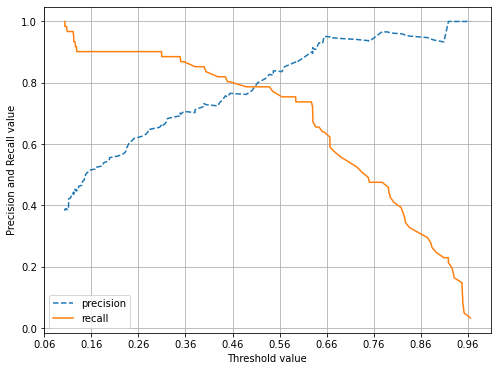

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # get precision and recall ndarray per thresholds
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # Set X-axis as thresholds; Y-axis for Precision & Recall 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # Plot X-axis in 0.1 interval
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # xSetting label, legend, and grid
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


## 1) Method to incrase your precision
#### Strengthen your positive index. For instance, only diagnose cancer when you are 100% sure (older than 80, obesitiy, cancer cell size in 99% percentile). Precision equation is TP / (TP + FP). So if you get only one positive patient the score became 100%

## 2) Method to increase your recall
#### Diagnoe every patients as positive beacuse TN is not included in the matrix and FN is 0. Either way your score become 100%

## But of course everything should be balanced...

# 3. F1 Score: Mixture of Precision & Recall

In [18]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 Score: {0:.4f}'.format(f1))

F1 Score: 0.7805


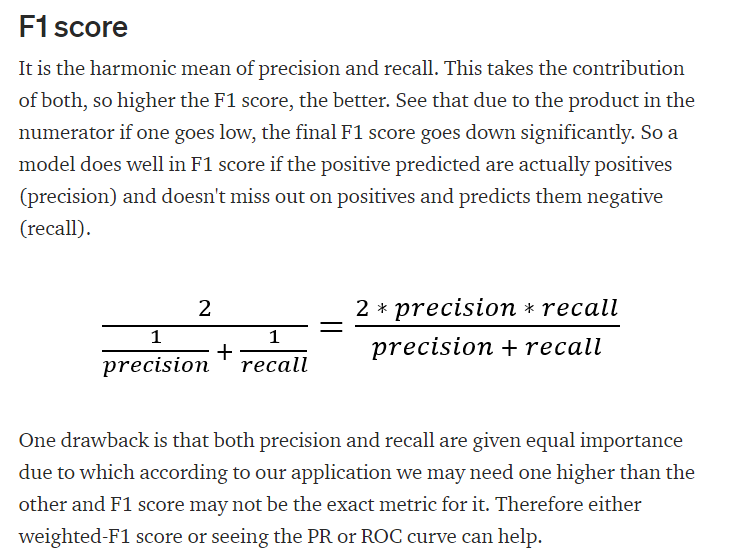

In [22]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # Adding F1 Score
    f1 = f1_score(y_test,pred)
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
from sklearn.preprocessing import Binarizer
    
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('thresholds:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


thresholds: 0.4
Confusion Matrix
[[99 19]
 [10 51]]
Accuracy: 0.8380, Precision: 0.7286, Recall: 0.8361, F1:0.7786
thresholds: 0.45
Confusion Matrix
[[103  15]
 [ 12  49]]
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033, F1:0.7840
thresholds: 0.5
Confusion Matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869, F1:0.7805
thresholds: 0.55
Confusion Matrix
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Precision: 0.8364, Recall: 0.7541, F1:0.7931
thresholds: 0.6
Confusion Matrix
[[112   6]
 [ 16  45]]
Accuracy: 0.8771, Precision: 0.8824, Recall: 0.7377, F1:0.8036


#### thresholds 0.6; the F1 score is at the highest; however, do note that recall score is lacking behind than other thresholds

## Lastly. ROC Curve

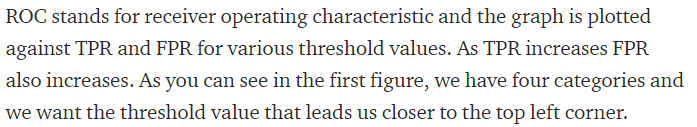

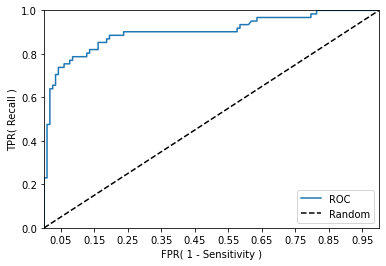

In [26]:
def roc_curve_plot(y_test , pred_proba_c1):
    # calculate TPR, FPR per thresholds
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # Plot data
    plt.plot(fprs , tprs, label='ROC')
    # Linear line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # legend
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


## You can actually calcuate the area (AUC)

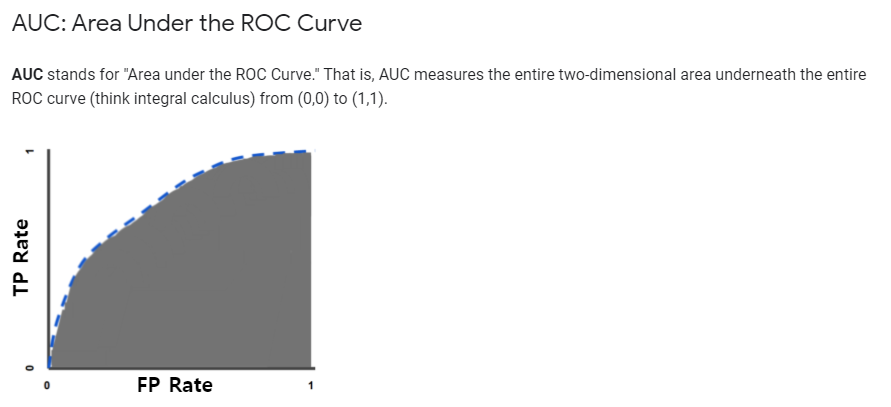

In [27]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC value: {0:.4f}'.format(roc_score))

ROC AUC value: 0.9024


### There is also something called PR Curve

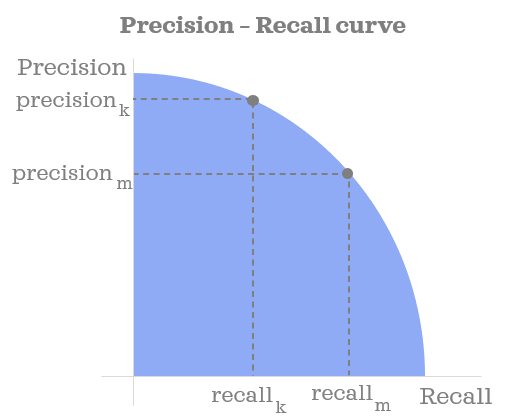

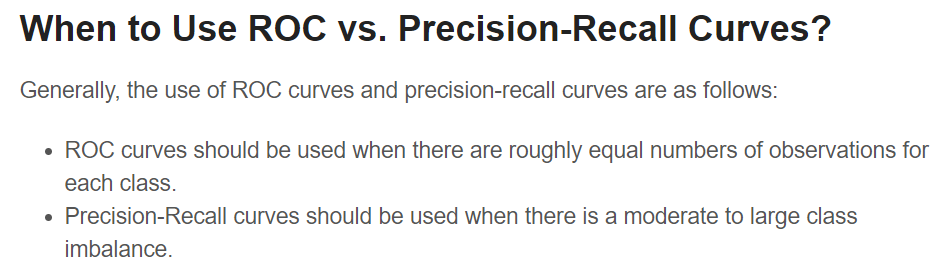

## How should I calculate PR AUC? 

### Well, I'll leave it as a homework

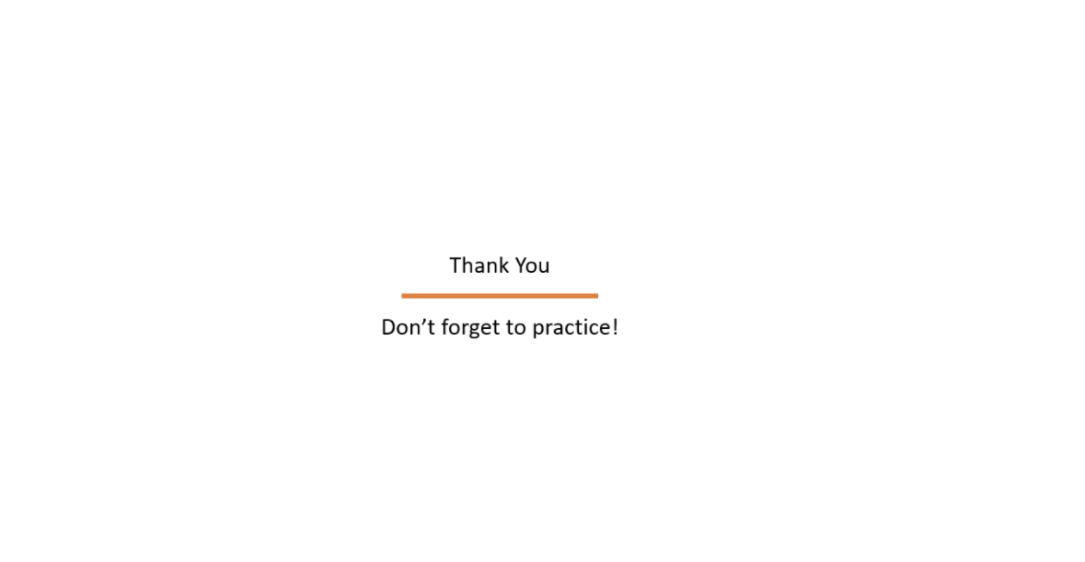

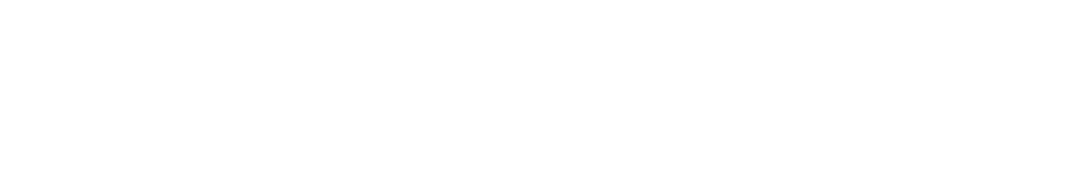

## Seung Jun Choi in Urban Information Lab
### Regression Exercise: Bike-Sharing Demand Prediction

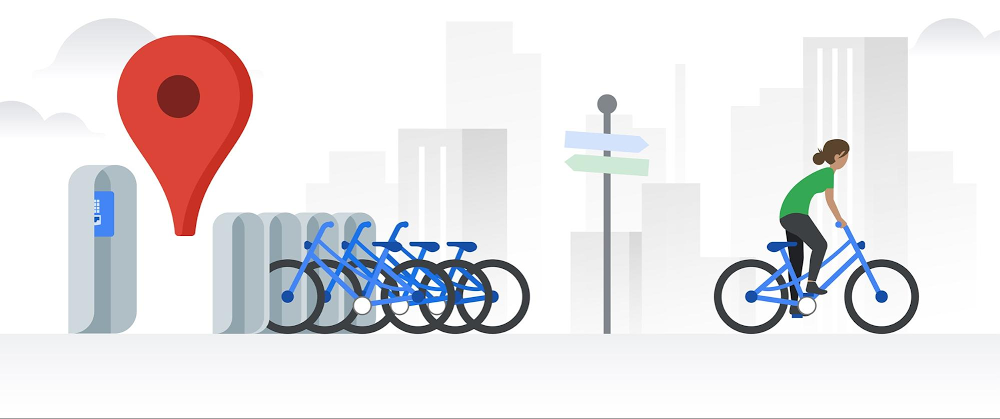

### For those of you unfamiliar with Bike-Sharing

## Bike-sharing  is a shared micromobility service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system.

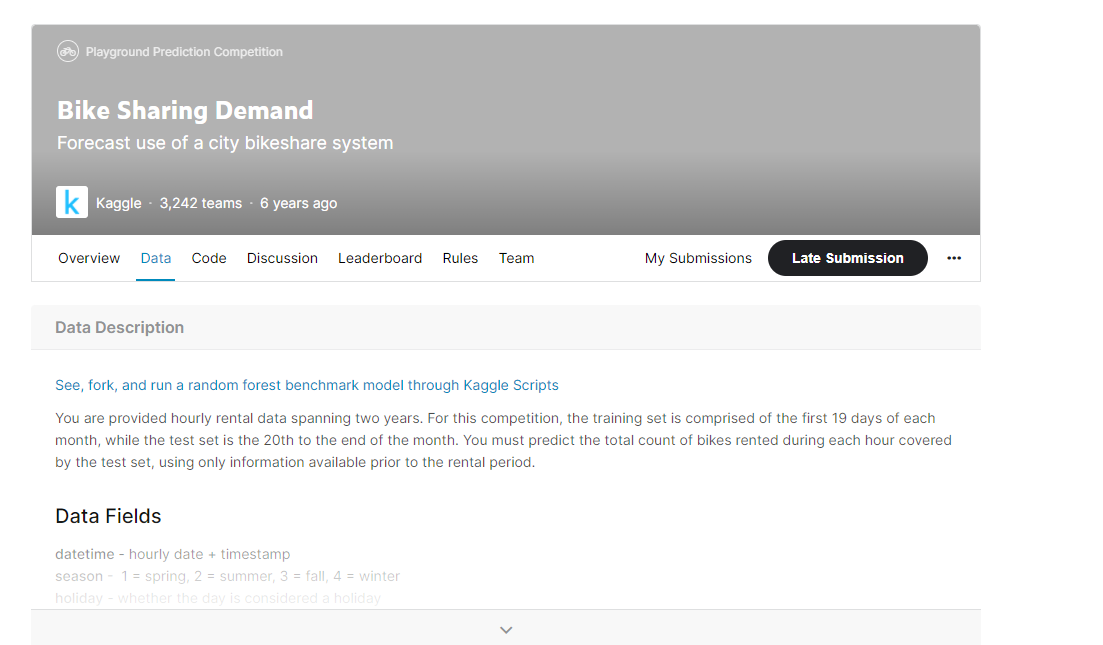

## 1. Take a look into your data

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


#### It has 10,886 records and include 12 features/columns

In [31]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### The features are mostly numeric; however, the 'datetime' column is assigned as object, and to plot this into daily we need reassign them into year-month-day format

In [33]:
# Assign datetime into datetime type
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# From the datetime assign year, month, day, and hour
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [34]:
bike_df.shape

(10886, 16)

#### Now four features are added (year, month day, hour)

#### However, it seems some of the data is redundant. The count feature is actually the sum of casual and registered bike sharing use. So we are going to delete those features.

In [35]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

#### To evluate regression models we use...

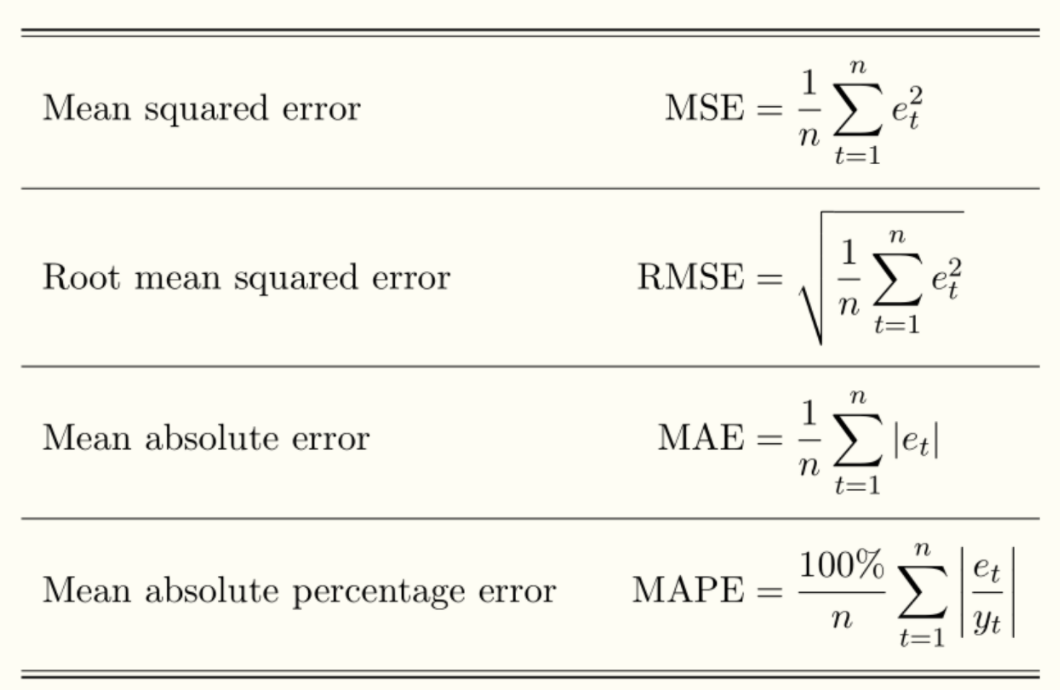

In [38]:
# We use sklearn.metrics and import the modules for evluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# However, one thing that we should keep in mind is that Sckit learn do not offer RMSLE(Root Mean Suqared Log Error)
# Therefore, we have to manually define RMSLE as below
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [39]:
# RMSE
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [40]:
# MSE, RMSE, RMSLE 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    
    # MAE equation already exists in sklearn modules
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

## 2. Modelling
### Let's use linear regression first

In [41]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


#### Considering the bike-sharing count we have... the error is a bit high

In [43]:
bike_df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

#### So let's compare the prediction with actual data

In [45]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # Using Featuers in DataFrame and comparing them with one another
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # Pulling out them in orders
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


#### The average bike-sharing use was 191 and median was 145. Prediction gap greater than 500 does not seem to fit actual result

## The reson is the bike-sharing count is left biased

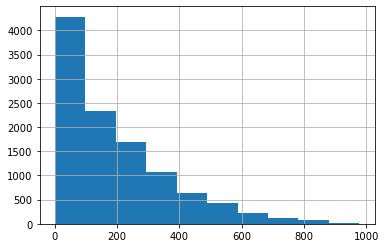

In [46]:
y_target.hist()

### Let's take log on our DV

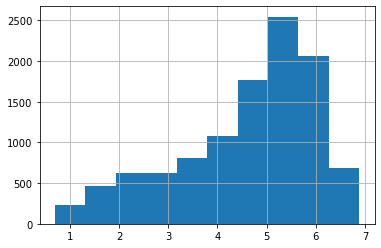

In [47]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

#### Now it seems the variable more seem to follow normalized distribution. Let's retrain your linear model.

In [49]:

y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


#### The RMSLE score decreased; however, RMSE increased. What's happening here?

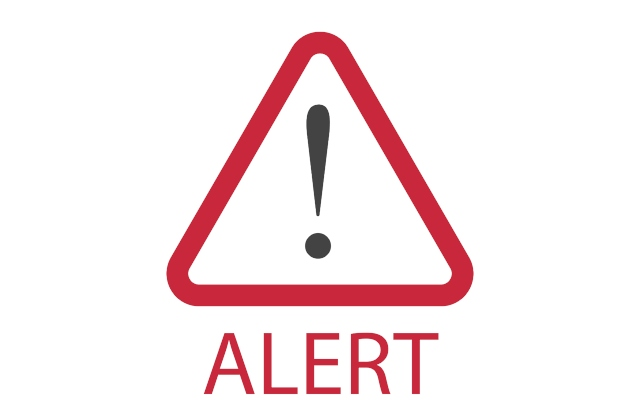

## 3. Model Validation

### Take a look on features' coefficient

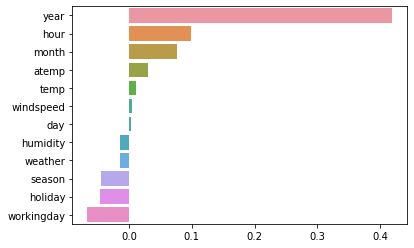

In [50]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### Datetime feature including year, hour, month, day is having greatest coefficient.
### The data is only from year 2011 and 2012 so year having highest coefficient does not make sense.

## It's because the value is affecting your training
### -> One Hot Encoding

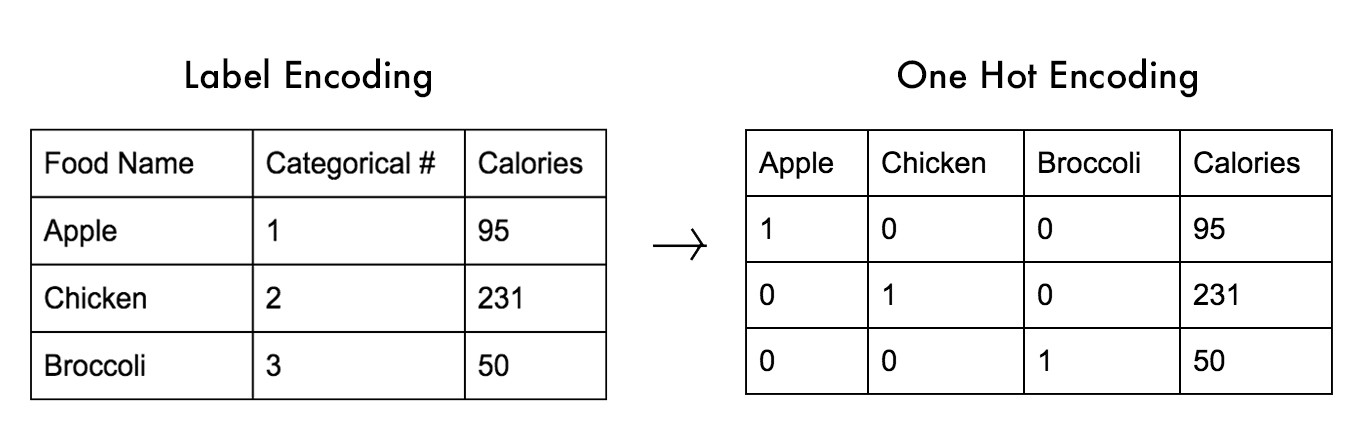

### Year and Day is just a date itself; year 2012 does not have greater value than year 2011. It is just label.

In [51]:
# 'year', month', 'day', hour' -> One hot encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

### Retrain your data after one hot encoding
#### I'll be modelling ridge and Lasso too

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# Error Score
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model Evluation
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


## Do you see the difference?

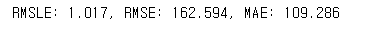

### Replot coefficient

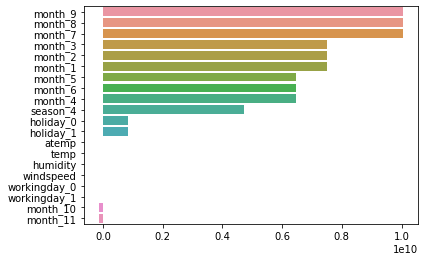

In [55]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


## In linear model, how you setup your feature hugely effect your models

## +Bonus, I'll train DecisionTree based regression models too

In [56]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# RandomForest, GBM, XGBoost, LightGBM model 
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost may troubleshoot if your input is DataFrame so assign them in ndarray
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.328, MAE: 31.067
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.365, MAE: 32.753
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


#### Comparing with linear models, DecisionTree models' error score is lower; however, this does not mean that DecisionTree model is performing better than linear models.

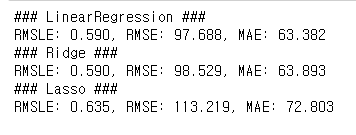

## Ultimately, the model performance depends on features and how we setup & preprocess those features

### In DecisionTree models and classifiaction models (both linear + nonlinear) you can pull out feature importances

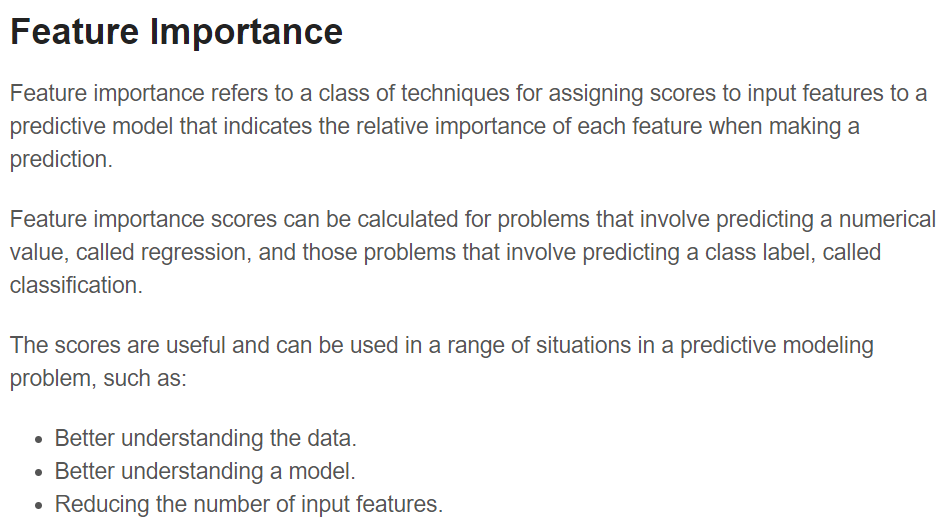

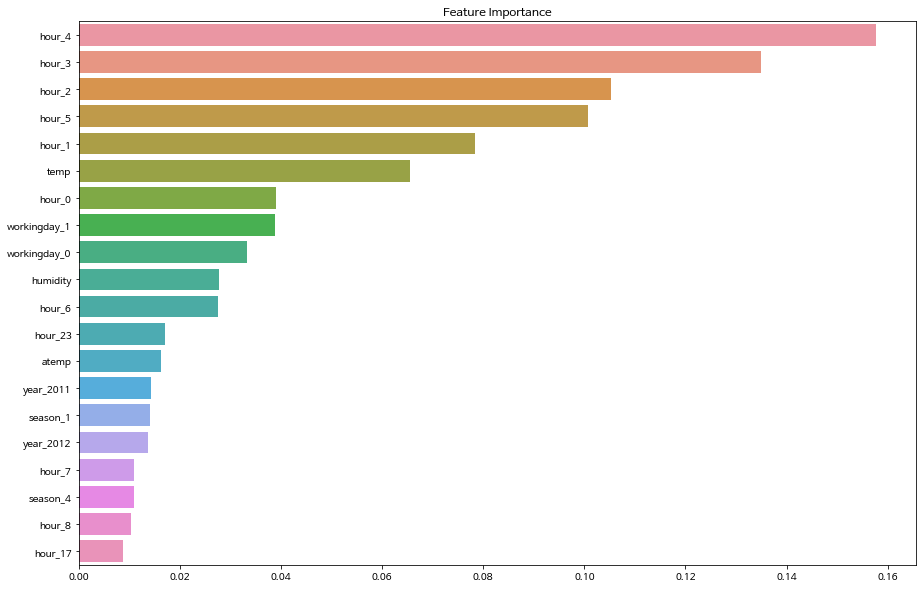

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumBarunGothic.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

ftr_importances_values = rf_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
sns.set(font_scale=1.1)
plt.show()

## This is helpful tips for policymakers. In terms of bike-sharing certain hour periods and climate factors are having highest importance than other features.
## But, if the data or your model is biased... be careful with interpreting the feature importances

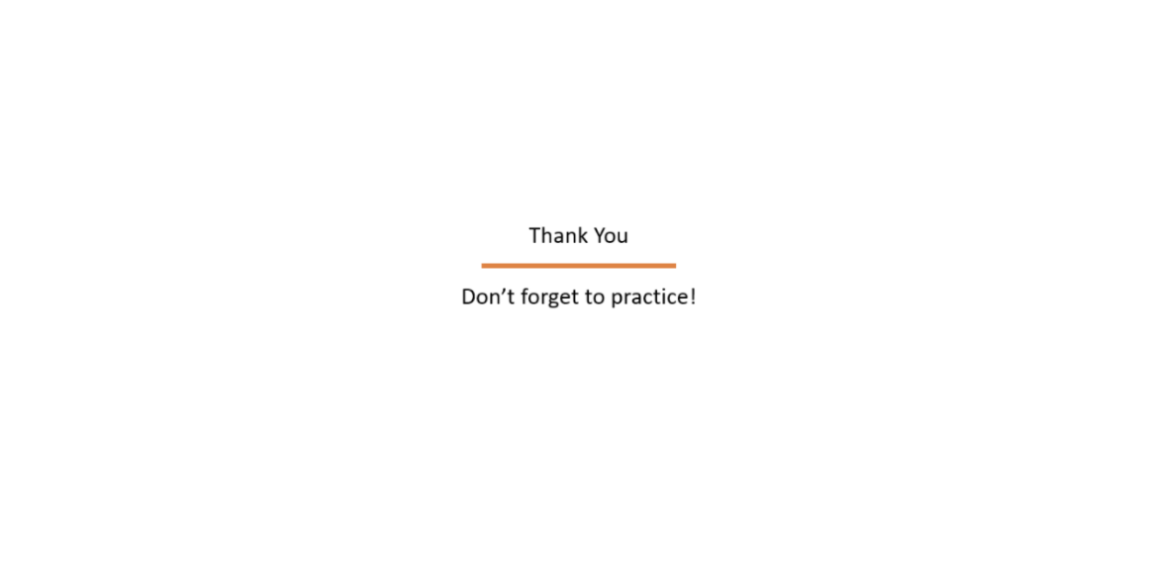

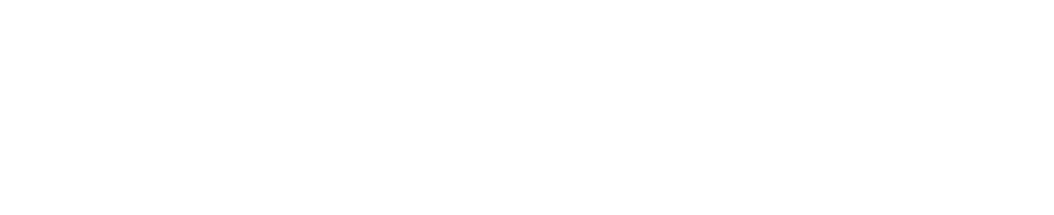